In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import pylab as pl

#Used for confusion matrix
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [11]:
df = pd.read_csv('DataForModelling.csv')
dfonlysigni = pd.read_csv('OnlySignificantX.csv')

Removing the first unknown column from the dataset. Check for yourself for more details

In [12]:
df = df.iloc[:, 1:]

In [13]:
dfonlysigni = dfonlysigni.iloc[:, 1:]

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Binned,MonthlyCharges_Binned,tenure_Binned
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,1,1,29.85,29.85,0,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,1,0,0,56.95,1889.50,0,2,1,2
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,1,0,53.85,108.15,1,0,1,0
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,1,0,2,42.30,1840.75,0,2,1,2
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,1,1,70.70,151.65,1,0,2,0


In [15]:
dfonlysigni.head()

,SeniorCitizen_1,Partner_1,Dependents_1,MultipleLines_1,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,...,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,MonthlyCharges_Binned_1,MonthlyCharges_Binned_2,MonthlyCharges_Binned_3,tenure_Binned_2,tenure_Binned_3
0,0,1,0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


# Random Forest - Ensemble of decision trees

In [16]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [9]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.7473385379701917

[[875 166]
 [190 178]]


             precision    recall  f1-score   support

          0       0.82      0.84      0.83      1041
          1       0.52      0.48      0.50       368

avg / total       0.74      0.75      0.74      1409



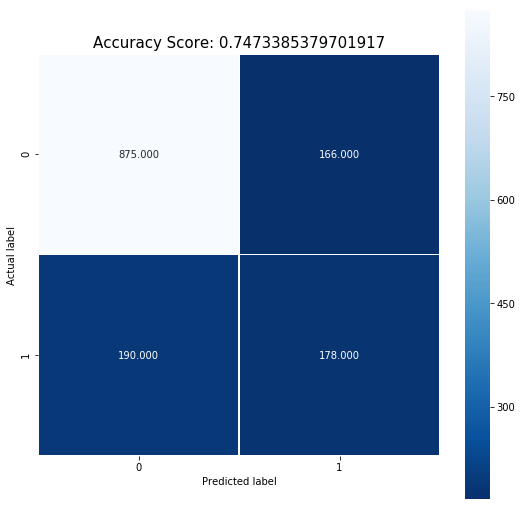

In [10]:
ypred_rf = rf.predict(x_test) 
# Use score method to get accuracy of model
score_rf = rf.score(x_test, y_test)
print(score_rf)
print()
#Confusion Matrix
cm_rf = metrics.confusion_matrix(y_test, ypred_rf)
print(cm_rf)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_rf)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_rf))

In [11]:
rf.score(x_train, y_train)

0.9171104011359602

Decision tree model accuracy on training set: 0.9219027334043308 

Random Forest model accuracy on training set: 0.9169329073482428

So, Overfitting effect is reduced when random forest is used

In [51]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [53]:
# Create the model to use for hyperparameter tuning
model = RandomForestClassifier()

# Set up the random search with 10-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=random_grid,
                               cv=10, n_iter=100,
                               n_jobs = -1, verbose = 2, 
                               return_train_score = True,
                               random_state=42)

In [10]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

NameError: name 'dfonlysigni' is not defined

In [55]:
# Fit the random search model
# random_cv.fit(x_train, y_train)
# random_cv.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 53.7min finished


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
# {'bootstrap': False,
#  'max_depth': 10,
#  'max_features': 'log2',
#  'min_samples_leaf': 4,
#  'min_samples_split': 5,
#  'n_estimators': 200}

0.7885024840312278
Accuracy in training set: 0.8182463613773517

[[944  97]
 [201 167]]


             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1041
          1       0.63      0.45      0.53       368

avg / total       0.77      0.79      0.78      1409



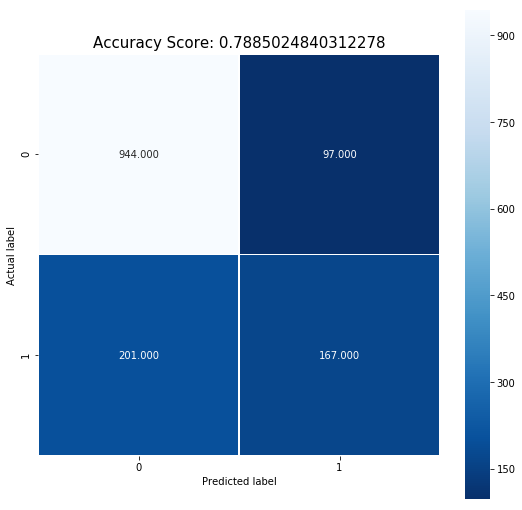

In [60]:
ypred_rfmt = random_cv.predict(x_test) 
# Use score method to get accuracy of model
score_rfmt = random_cv.score(x_test, y_test)
score_rfmt_training = random_cv.score(x_train, y_train)
print(score_rfmt)
print("Accuracy in training set:", score_rfmt_training)
print()
#Confusion Matrix
cm_rfmt = metrics.confusion_matrix(y_test, ypred_rfmt)
print(cm_rfmt)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_rfmt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_rfmt)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_rfmt))

# Bagging or Bootstrap Aggregation

In [13]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

0.752306600425834

[[886 155]
 [194 174]]


             precision    recall  f1-score   support

          0       0.82      0.85      0.84      1041
          1       0.53      0.47      0.50       368

avg / total       0.74      0.75      0.75      1409



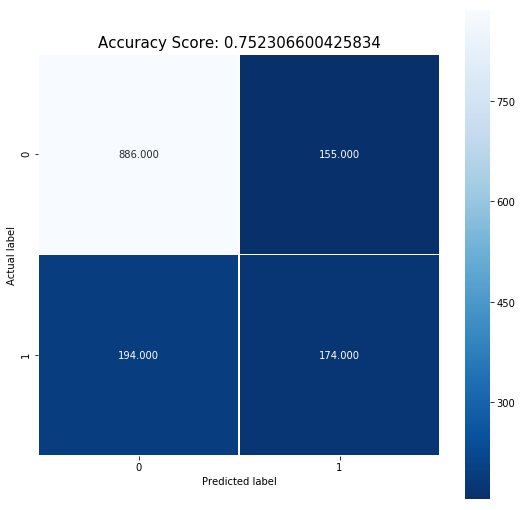

In [14]:
ypred_bgdt = bg.predict(x_test) 
# Use score method to get accuracy of model
score_bgdt = bg.score(x_test, y_test)
print(score_bgdt)
print()
#Confusion Matrix
cm_bgdt = metrics.confusion_matrix(y_test, ypred_bgdt)
print(cm_bgdt)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_bgdt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_bgdt)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_bgdt))

In [15]:
bg.score(x_train, y_train)

0.8867589634362797

Bagged decision tree algorithm has higher accuracy compared to DT, RF and has the least overfitting effect

In [63]:
X.shape[1]

29

In [66]:
# Number of trees in the bagged classifier
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
# Number of features to consider for every random pick
max_features = [int(x) for x in np.linspace(start = 1, stop = X.shape[1], num = 29)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Selecting features with replacement
bootstrap_features = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap,
               'bootstrap_features': bootstrap_features}
pprint(random_grid)

{'bootstrap': [True, False],
 'bootstrap_features': [True, False],
 'max_features': [1,
                  2,
                  3,
                  4,
                  5,
                  6,
                  7,
                  8,
                  9,
                  10,
                  11,
                  12,
                  13,
                  14,
                  15,
                  16,
                  17,
                  18,
                  19,
                  20,
                  21,
                  22,
                  23,
                  24,
                  25,
                  26,
                  27,
                  28,
                  29],
 'n_estimators': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [71]:
# Create the model to use for hyperparameter tuning
model = BaggingClassifier(DecisionTreeClassifier())

# Set up the random search with 10-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=random_grid,
                               cv=10, n_iter=100,
                               n_jobs = -1, verbose = 2, 
                               return_train_score = True,
                               random_state=42)

In [74]:
#Fit the random search model
random_cv.fit(x_train, y_train)
random_cv.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 23.9min finished


{'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 18,
 'n_estimators': 445}

0.7856635911994322
Accuracy in training set: 0.8292509762158324

[[961  80]
 [222 146]]


             precision    recall  f1-score   support

          0       0.81      0.92      0.86      1041
          1       0.65      0.40      0.49       368

avg / total       0.77      0.79      0.77      1409



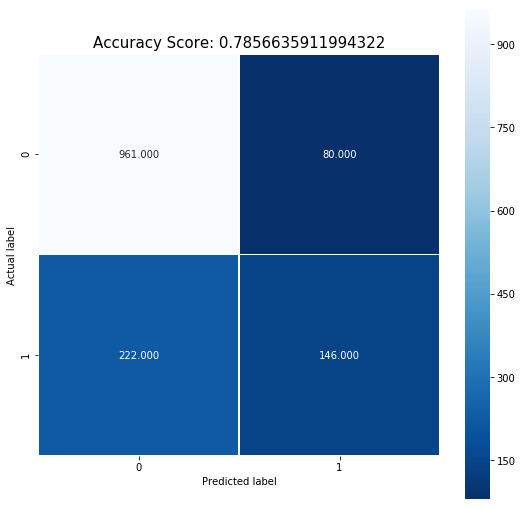

In [75]:
ypred_bdtmt = random_cv.predict(x_test) 
# Use score method to get accuracy of model
score_bdtmt = random_cv.score(x_test, y_test)
score_bdtmt_training = random_cv.score(x_train, y_train)
print(score_bdtmt)
print("Accuracy in training set:", score_bdtmt_training)
print()
#Confusion Matrix
cm_bdtmt = metrics.confusion_matrix(y_test, ypred_bdtmt)
print(cm_bdtmt)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_bdtmt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_bdtmt)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_bdtmt))

# Boosting - Ada Boost

In [16]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 10, learning_rate = 1)
adb.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=10, random_state=None)

0.7388218594748048

[[844 197]
 [171 197]]


             precision    recall  f1-score   support

          0       0.83      0.81      0.82      1041
          1       0.50      0.54      0.52       368

avg / total       0.74      0.74      0.74      1409



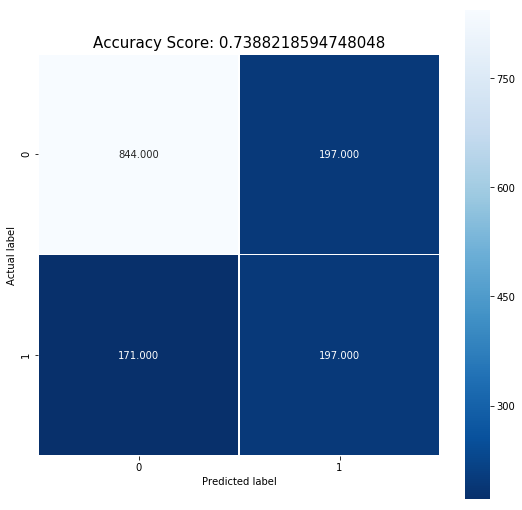

In [17]:
ypred_adbdt = adb.predict(x_test) 
# Use score method to get accuracy of model
score_adbdt = adb.score(x_test, y_test)
print(score_adbdt)
print()
#Confusion Matrix
cm_adbdt = metrics.confusion_matrix(y_test, ypred_adbdt)
print(cm_adbdt)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_adbdt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_adbdt)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_adbdt))

In [18]:
adb.score(x_train, y_train)

0.9219027334043308

In [22]:
[float(x) for x in np.linspace(start = 0.0000000001, stop = 1, num = 10)]

[1e-10,
 0.11111111119999999,
 0.2222222223,
 0.3333333334,
 0.4444444445,
 0.5555555556,
 0.6666666667,
 0.7777777777999999,
 0.8888888889,
 1.0]

In [26]:
from pprint import pprint
# Number of trees in the Adaboosted classifier
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
# Learning rate for boosting
learning_rate = [float(x) for x in np.linspace(start = 0.0000000001, stop = 1, num = 10)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
pprint(random_grid)

{'learning_rate': [1e-10,
                   0.11111111119999999,
                   0.2222222223,
                   0.3333333334,
                   0.4444444445,
                   0.5555555556,
                   0.6666666667,
                   0.7777777777999999,
                   0.8888888889,
                   1.0],
 'n_estimators': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [27]:
# Create the model to use for hyperparameter tuning
model = AdaBoostClassifier(DecisionTreeClassifier())

# Set up the random search with 10-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=random_grid,
                               cv=10, n_iter=100,
                               n_jobs = -1, verbose = 2, 
                               return_train_score = True,
                               random_state=42)

In [28]:
#Fit the random search model
random_cv.fit(x_train, y_train)
random_cv.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 34.3min finished


{'learning_rate': 0.6666666667, 'n_estimators': 223}

In [29]:
# {'learning_rate': 0.6666666667, 'n_estimators': 223}

0.7480482611781405
Accuracy in training set: 0.9219027334043308

[[870 171]
 [184 184]]


             precision    recall  f1-score   support

          0       0.83      0.84      0.83      1041
          1       0.52      0.50      0.51       368

avg / total       0.75      0.75      0.75      1409



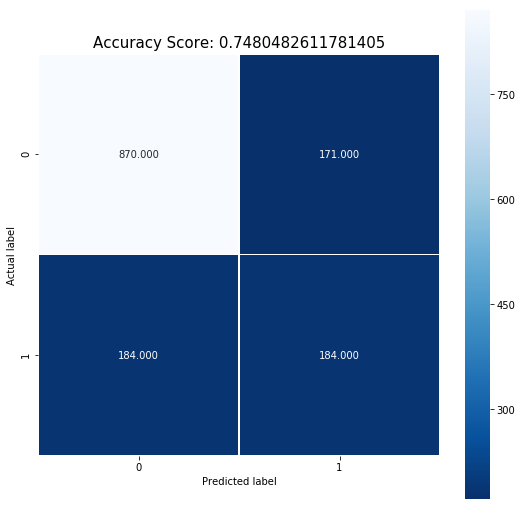

In [30]:
ypred_abdtmt = random_cv.predict(x_test) 
# Use score method to get accuracy of model
score_abdtmt = random_cv.score(x_test, y_test)
score_abdtmt_training = random_cv.score(x_train, y_train)
print(score_abdtmt)
print("Accuracy in training set:", score_abdtmt_training)
print()
#Confusion Matrix
cm_abdtmt = metrics.confusion_matrix(y_test, ypred_abdtmt)
print(cm_abdtmt)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_abdtmt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_abdtmt)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_abdtmt))

# SVM

In [19]:
svma = SVC(kernel = 'linear')
svma.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7757274662881476
Accuracy in training set: 0.7839900603478879

[[919 122]
 [194 174]]


             precision    recall  f1-score   support

          0       0.83      0.88      0.85      1041
          1       0.59      0.47      0.52       368

avg / total       0.76      0.78      0.77      1409



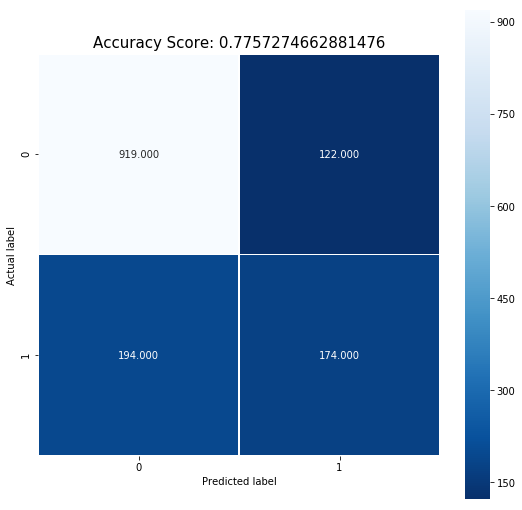

In [20]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [21]:
svma = SVC(kernel = 'poly')
svma.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7409510290986515
Accuracy in training set: 0.7399716009939652

[[1038    3]
 [ 362    6]]


             precision    recall  f1-score   support

          0       0.74      1.00      0.85      1041
          1       0.67      0.02      0.03       368

avg / total       0.72      0.74      0.64      1409



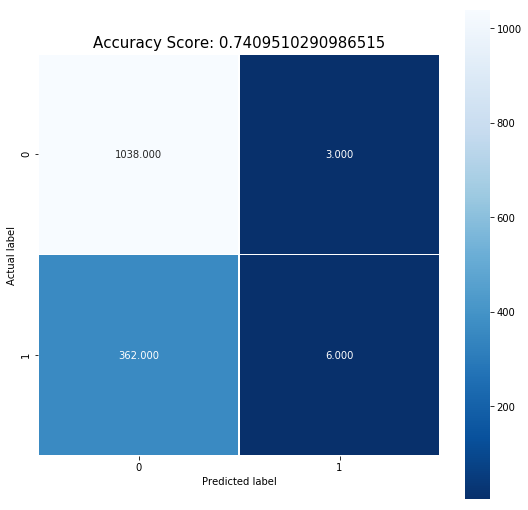

In [22]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [23]:
svma = SVC(kernel = 'rbf')
svma.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7849538679914834
Accuracy in training set: 0.7921547745828896

[[941 100]
 [203 165]]


             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1041
          1       0.62      0.45      0.52       368

avg / total       0.77      0.78      0.77      1409



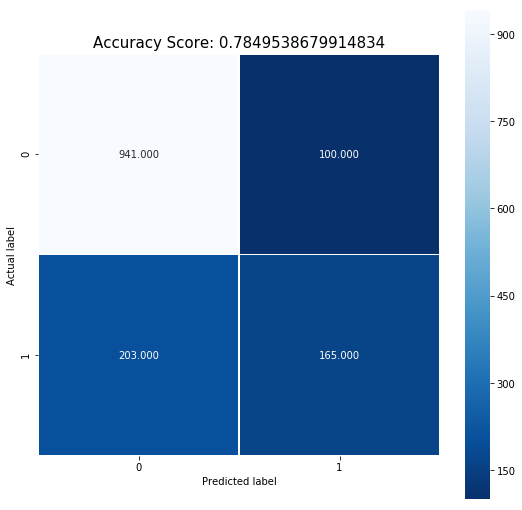

In [24]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [25]:
svma = SVC(C= 0.50, kernel = 'rbf')
svma.fit(x_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.78708303761533
Accuracy in training set: 0.7932197373091942

[[945  96]
 [204 164]]


             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1041
          1       0.63      0.45      0.52       368

avg / total       0.77      0.79      0.77      1409



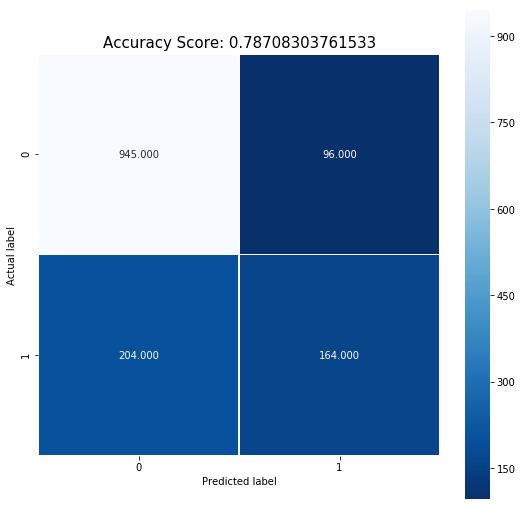

In [26]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [27]:
svma = SVC(C= 0.50, gamma=0.08, kernel = 'rbf')
svma.fit(x_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.08, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7913413768630234
Accuracy in training set: 0.7962371317003905

[[957  84]
 [210 158]]


             precision    recall  f1-score   support

          0       0.82      0.92      0.87      1041
          1       0.65      0.43      0.52       368

avg / total       0.78      0.79      0.78      1409



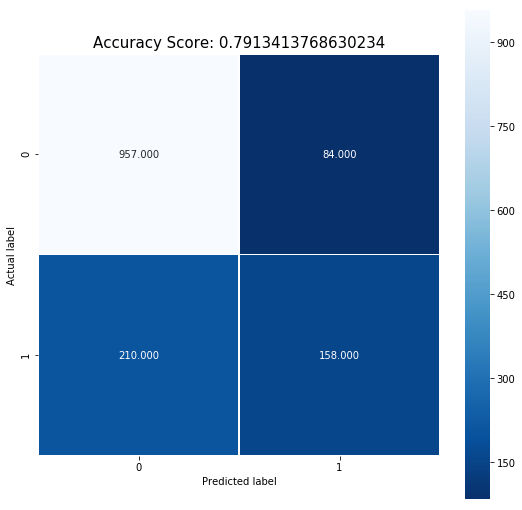

In [28]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [29]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [32]:
# from sklearn.model_selection import KFold

# K = 10
# kf = KFold(n_splits=K, shuffle=True, random_state=42)
# cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for c in cs:
#     train_errors = []
#     validation_errors = []
#     for train_index, val_index in kf.split(x_train, y_train):
        
#         # split data
#         X_train, X_val = x_train[train_index], x_train[val_index]
#         y_train, y_val = y_train[train_index], y_train[val_index]

#         # instantiate model
#         svma = SVC(C= c, kernel = 'rbf')
        
#         #calculate errors
#         train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, svma)
        
#         # append to appropriate list
#         train_errors.append(train_error)
#         validation_errors.append(val_error)
    
#     # generate report
#     print('C: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
#           format(c, round(np.mean(train_errors),4), round(np.mean(validation_errors),4)))

In [33]:
# from sklearn.model_selection import KFold

# K = 10
# kf = KFold(n_splits=K, shuffle=True, random_state=42)
# gs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for g in gs:
#     train_errors = []
#     validation_errors = []
#     for train_index, val_index in kf.split(X, y):
        
#         # split data
#         X_train, X_val = X[train_index], X[val_index]
#         y_train, y_val = y[train_index], y[val_index]

#         # instantiate model
#         svma = SVC(C= 100, gamma = g, kernel = 'rbf')
        
#         #calculate errors
#         train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, svma)
        
#         # append to appropriate list
#         train_errors.append(train_error)
#         validation_errors.append(val_error)
    
#     # generate report
#     print('gamma: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
#           format(g, round(np.mean(train_errors),4), round(np.mean(validation_errors),4)))

In [34]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [35]:
svma = SVC(C= 100, kernel = 'rbf')
svma.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7828246983676366
Accuracy in training set: 0.8196663116790912

[[920 121]
 [185 183]]


             precision    recall  f1-score   support

          0       0.83      0.88      0.86      1041
          1       0.60      0.50      0.54       368

avg / total       0.77      0.78      0.78      1409



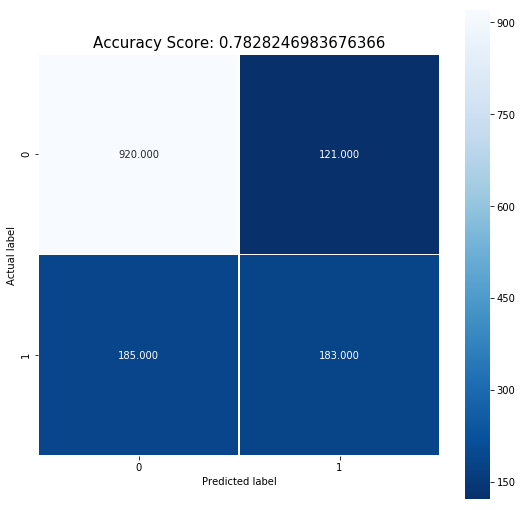

In [36]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [37]:
svma = SVC(C= 100, gamma=0.01, kernel = 'rbf')
svma.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7877927608232789
Accuracy in training set: 0.7921547745828896

[[944  97]
 [202 166]]


             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1041
          1       0.63      0.45      0.53       368

avg / total       0.77      0.79      0.78      1409



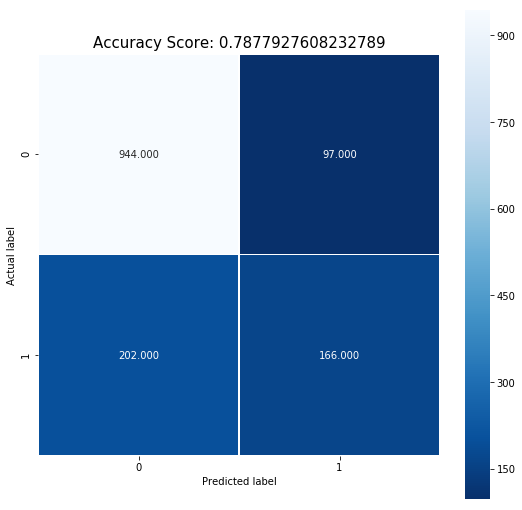

In [38]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [39]:
# from sklearn.model_selection import KFold
# data = x_train
# target = y_train
# K = 10
# kf = KFold(n_splits=K, shuffle=True, random_state=42)
# cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for c in cs:
#     train_errors = []
#     validation_errors = []
#     for train_index, val_index in kf.split(data, target):
        
#         # split data
#         X_train, X_val = data[train_index], data[val_index]
#         y_train, y_val = target[train_index], target[val_index]

#         # instantiate model
#         svma = SVC(C= c, kernel = 'rbf')
        
#         #calculate errors
#         train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, svma)
        
#         # append to appropriate list
#         train_errors.append(train_error)
#         validation_errors.append(val_error)
    
#     # generate report
#     print('C: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
#           format(c, round(np.mean(train_errors),4), round(np.mean(validation_errors),4)))

In [40]:
svma = SVC(C= 0.1, kernel = 'rbf')
svma.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7785663591199432
Accuracy in training set: 0.7941072062477813

[[955  86]
 [226 142]]


             precision    recall  f1-score   support

          0       0.81      0.92      0.86      1041
          1       0.62      0.39      0.48       368

avg / total       0.76      0.78      0.76      1409



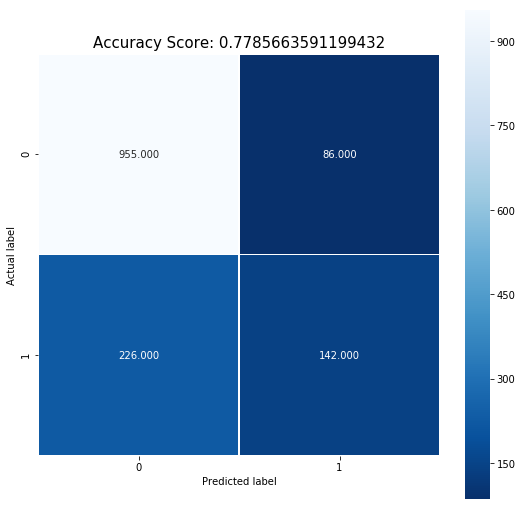

In [41]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

In [42]:
# X= dfonlysigni.values
# y= df.iloc[:, 20].values

# #Splitting Datasets into Training and Test
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [43]:
# from sklearn.model_selection import KFold
# data = x_train
# target = y_train
# K = 10
# kf = KFold(n_splits=K, shuffle=True, random_state=42)
# gs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for g in gs:
#     for c in cs:
#         train_errors = []
#         validation_errors = []
#         for train_index, val_index in kf.split(data, target):
#             # split data
#             X_train, X_val = data[train_index], data[val_index]
#             y_train, y_val = target[train_index], target[val_index]

#             # instantiate model
#             svma = SVC(C= c, gamma= g, kernel = 'rbf')
        
#             #calculate errors
#             train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, svma)
        
#             # append to appropriate list
#             train_errors.append(train_error)
#             validation_errors.append(val_error)
    
#         # generate report
#         print('C: {:6} | gamma: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
#         format(c, g, round(np.mean(train_errors),4), round(np.mean(validation_errors),4)))

In [44]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [45]:
svma = SVC(C= 1, gamma= 0.01, kernel = 'rbf')
svma.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7835344215755855
Accuracy in training set: 0.7914447994320198

[[936 105]
 [200 168]]


             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1041
          1       0.62      0.46      0.52       368

avg / total       0.77      0.78      0.77      1409



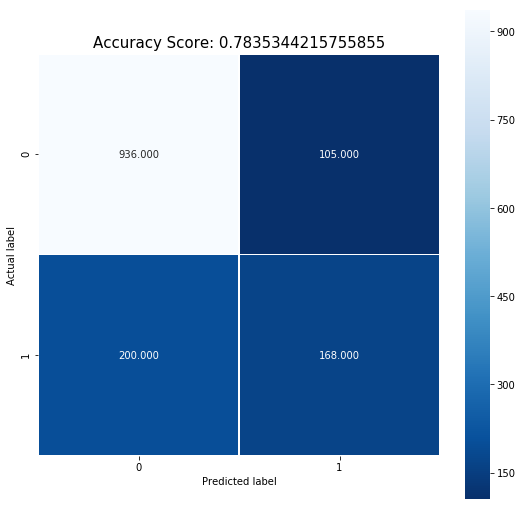

In [46]:
ypred_svma = svma.predict(x_test) 
# Use score method to get accuracy of model
score_svma = svma.score(x_test, y_test)
score_svma_training = svma.score(x_train, y_train)
print(score_svma)
print("Accuracy in training set:", score_svma_training)
print()
#Confusion Matrix
cm_svma = metrics.confusion_matrix(y_test, ypred_svma)
print(cm_svma)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_svma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_svma)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_svma))

# Voting Classifier - Multiple Model Ensemble

In [33]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel='rbf')

In [48]:
evc = VotingClassifier(estimators=[('lr', lr),('dt', dt),('svm', svm)], voting='hard')
evc.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Decisio...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

C:\Users\saira_p\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\saira_p\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7877927608232789

[[932 109]
 [190 178]]


             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1041
          1       0.62      0.48      0.54       368

avg / total       0.78      0.79      0.78      1409



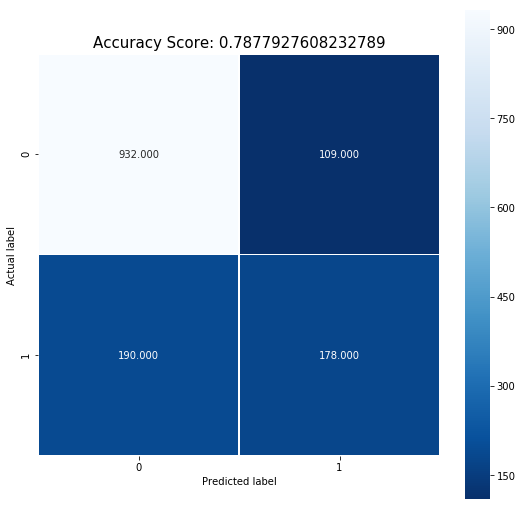

In [49]:
ypred_evc = evc.predict(x_test) 
# Use score method to get accuracy of model
score_evc = evc.score(x_test, y_test)
print(score_evc)
print()
#Confusion Matrix
cm_evc = metrics.confusion_matrix(y_test, ypred_evc)
print(cm_evc)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_evc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_evc)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_evc))

In [50]:
evc.score(x_train, y_train)

C:\Users\saira_p\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8146964856230032

In [31]:
# Weights of the various classifiers in the voting classifier
weights = [[1,2,3],[2,1,3],[3,2,1],[1,3,2],[3,1,2],[2,3,1],None]
# Learning rate for boosting
voting = ['hard','soft']
# Create the random grid
random_grid = {'weights': weights,
               'voting': voting}
pprint(random_grid)

{'voting': ['hard', 'soft'],
 'weights': [[1, 2, 3],
             [2, 1, 3],
             [3, 2, 1],
             [1, 3, 2],
             [3, 1, 2],
             [2, 3, 1],
             None]}


In [41]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel='rbf', probability=True)

In [42]:
# Create the model to use for hyperparameter tuning
model = VotingClassifier(estimators=[('lr', lr),('dt', dt),('svm', svm)])

# Set up the random search with 10-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=random_grid,
                               cv=10, n_iter=14,
                               n_jobs = -1, verbose = 2, 
                               return_train_score = True,
                               random_state=42)

In [35]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [43]:
# random_cv.fit(x_train, y_train)
# random_cv.best_params_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  5.5min finished


{'voting': 'hard', 'weights': [3, 1, 2]}

In [44]:
# Optimal values for parameters of this voting classifier are:
# {'voting': 'hard', 'weights': [3, 1, 2]}

C:\Users\saira_p\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\saira_p\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7856635911994322
Accuracy in training set: 0.8095491657791978

[[938 103]
 [199 169]]


             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1041
          1       0.62      0.46      0.53       368

avg / total       0.77      0.79      0.77      1409



C:\Users\saira_p\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


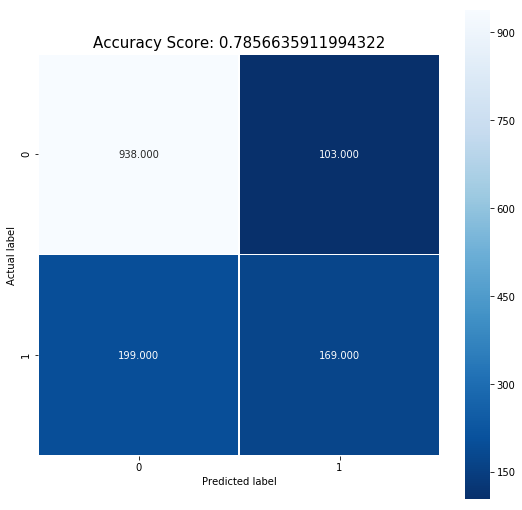

In [45]:
ypred_evcmt = random_cv.predict(x_test) 
# Use score method to get accuracy of model
score_evcmt = random_cv.score(x_test, y_test)
score_evcmt_training = random_cv.score(x_train, y_train)
print(score_evcmt)
print("Accuracy in training set:", score_evcmt_training)
print()
#Confusion Matrix
cm_evcmt = metrics.confusion_matrix(y_test, ypred_evcmt)
print(cm_evcmt)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_evcmt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_evcmt)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_evcmt))